<a href="https://colab.research.google.com/github/VeerVikramSingh/ML/blob/master/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score,precision_score,f1_score,classification_report
from sklearn.metrics import auc,roc_auc_score,confusion_matrix,accuracy_score

In [3]:
cc=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/credit_fraud.csv")
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
cc["Class"].value_counts()

0    9962
1      38
Name: Class, dtype: int64

In [0]:
# CLass Imabalance Problemss --> https://imbalanced-learn.readthedocs.io/en/stable/
# So, in order to address this issue, we have to add/subtract data - which means that it will give us bias - which needs to be checked if it's helping or not. 
# Upsampling Lower Class --> Adding more of fraud =1 ; same data 
            # Simulate a data ; generating data from the inherent distribution of fraud=1 
            # GAN's Generative Adverserial Network 
# Downsampling --> We will take only small examples of fraud =0, such that both classes are some what equated 
# Hybrid 
    # Sample of 1000 -> 500 Fraud and 500 of Non Fraud --> 10 Samples 
# Can we use simple accuracy?   # Assignment # Revision Point 
    # Give a business Justification  
    # Because We do not want Fraud cases to go unnoticed … its ok to have Non fraud cases identified as Fraud in some cases
    # What should be my focus in fraud case? False Postive or False Negative or Recall or Precision? 
    # FALSE NEGATIVE ---> 
    # False Positive ---> 
    # if both are important, then we will do F1 Score --> Harmonic Mean of Precision & Recall 

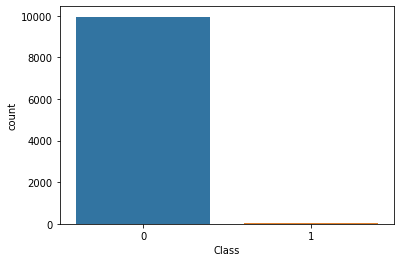

In [5]:
sns.countplot(x="Class",data=cc)

In [6]:
cc.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
cc.shape

(10000, 31)

In [8]:
cc.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5966.033400,-0.241862,0.281949,0.906270,0.264148,-0.046398,0.133108,-0.071689,-0.064778,0.802224,-0.222998,0.766066,-1.272513,0.851410,0.700597,-0.129634,-0.007757,0.318991,-0.016074,-0.070415,0.027511,-0.051990,-0.152671,-0.033268,0.021335,0.087146,0.108140,0.005518,0.002915,63.030188,0.00380
std,4473.403739,1.521679,1.308139,1.159154,1.441235,1.182935,1.307311,1.077430,1.259064,1.155198,1.093548,1.168600,1.527660,1.213055,1.239290,0.975573,0.882057,0.966392,0.794259,0.808373,0.589994,0.913811,0.631083,0.487814,0.594430,0.428171,0.562793,0.410868,0.266247,184.486158,0.06153
min,0.000000,-27.670569,-34.607649,-15.496222,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-6.329801,-13.193415,-2.595325,-17.769143,-3.389510,-19.214325,-4.152532,-12.227189,-18.587366,-6.920762,-4.932733,-13.276034,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.509250,0.000000,0.00000
25%,2072.750000,-1.013283,-0.208342,0.412799,-0.614424,-0.643390,-0.629934,-0.542336,-0.190747,0.070868,-0.688422,-0.063689,-2.368115,-0.017984,0.080400,-0.709531,-0.495536,-0.180029,-0.450302,-0.552134,-0.149981,-0.268120,-0.549638,-0.174120,-0.327817,-0.158137,-0.327974,-0.084489,-0.015753,5.000000,0.00000
50%,4563.500000,-0.372799,0.288524,0.944361,0.219861,-0.152769,-0.152566,-0.055585,0.012865,0.805275,-0.340720,0.746752,-1.621015,0.919134,0.899792,-0.010078,0.066086,0.297423,0.025225,-0.077208,-0.021415,-0.123273,-0.136746,-0.045794,0.079976,0.121001,0.042865,-0.004568,0.015897,15.950000,0.00000
75%,10233.250000,1.150864,0.901879,1.602903,1.125666,0.371081,0.505357,0.476280,0.274533,1.506299,0.174295,1.576540,0.082667,1.768889,1.499211,0.533501,0.547399,0.782865,0.459390,0.442908,0.156534,0.032707,0.247490,0.081665,0.410877,0.359058,0.476394,0.120811,0.077182,50.960000,0.00000
max,15012.000000,1.960497,8.636214,4.101716,10.463020,34.099309,21.393069,34.303177,5.060381,10.392889,12.259949,12.018913,3.774837,4.465413,5.748734,3.635042,4.087802,7.893393,4.115560,4.555359,8.012574,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.00000


In [14]:
cc[(cc["Amount"]>2000)]["Class"].value_counts()

0    10
Name: Class, dtype: int64

In [15]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    10000 non-null  int64  
 1   V1      10000 non-null  float64
 2   V2      10000 non-null  float64
 3   V3      10000 non-null  float64
 4   V4      10000 non-null  float64
 5   V5      10000 non-null  float64
 6   V6      10000 non-null  float64
 7   V7      10000 non-null  float64
 8   V8      10000 non-null  float64
 9   V9      10000 non-null  float64
 10  V10     10000 non-null  float64
 11  V11     10000 non-null  float64
 12  V12     10000 non-null  float64
 13  V13     10000 non-null  float64
 14  V14     10000 non-null  float64
 15  V15     10000 non-null  float64
 16  V16     10000 non-null  float64
 17  V17     10000 non-null  float64
 18  V18     10000 non-null  float64
 19  V19     10000 non-null  float64
 20  V20     10000 non-null  float64
 21  V21     10000 non-null  float64
 22 

In [16]:
cc.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [17]:
cc.isnull().sum().any()

False

Class as pie chart:


Text(0, 0.5, '')

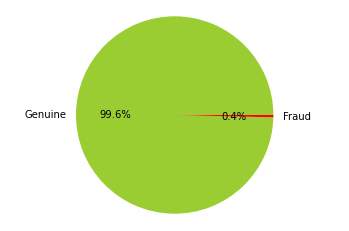

In [18]:
# Check Class variables that has 0 value for Genuine transactions and 1 for Fraud
print("Class as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(cc.Class.value_counts(),autopct='%1.1f%%', labels=['Genuine','Fraud'], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')

In [19]:
cc["Time"].head()

0    0
1    0
2    1
3    1
4    2
Name: Time, dtype: int64

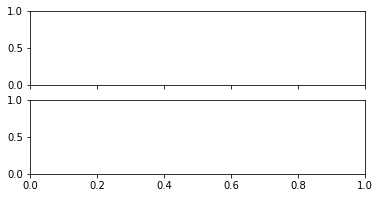

In [20]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(6,3))

Time variable
9995    4.166944
9996    4.167778
9997    4.168889
9998    4.169444
9999    4.170000
Name: Time_Hr, dtype: float64


Text(0, 0.5, '# transactions')

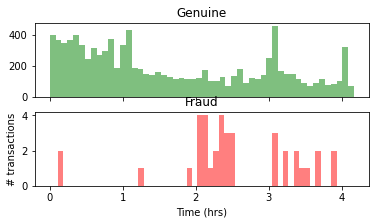

In [23]:
#plot Time to see if there is any trend
print("Time variable")
cc["Time_Hr"] = cc["Time"]/3600 # convert to hours
print(cc["Time_Hr"].tail(5))
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(6,3))
ax1.hist(cc["Time_Hr"][cc["Class"]==0],bins=52,color='g',alpha=0.5)
ax1.set_title('Genuine')
ax2.hist(cc.Time_Hr[cc.Class==1],bins=52,color='r',alpha=0.5)
ax2.set_title('Fraud')
plt.xlabel('Time (hrs)')
plt.ylabel('# transactions')

In [24]:
! pip install plotly_express


In [25]:
cc["Class"].dtype

dtype('int64')

In [26]:
cc["Class"].astype("object")

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Class, Length: 10000, dtype: object

In [0]:
import plotly_express as px

In [32]:
cc["Class"]=cc["Class"].astype("object")
cc["Time"]=cc["Time"]/3600
px.scatter(cc,x="Time_Hr",y="Amount",color="Class")

In [31]:
cc["Time"].head()

0    0.000000e+00
1    0.000000e+00
2    7.716049e-08
3    7.716049e-08
4    1.543210e-07
Name: Time, dtype: float64

In [37]:
px.scatter(cc, x="Time", y="Amount",size="Amount",color="Class",
           hover_name="Amount", log_x=True, size_max=20)

In [38]:
px.scatter_matrix(cc[['V1','V2','V3','Time','Amount','Class']],color="Class")

observation:

This "Time" feature shows that rate of transactions is picking up during day time. But number of transactions have almost similar dependence on time of the day for both the classes. 

So, I believe this feature does not yield any predictive power to distinguish between the two classes.

 But ofcourse we will later test this assumption. For now, I'll keep this feature in data frame. We will drop "Time

In [0]:
cc = cc.drop(['Time'],axis=1)

**plot Histogram to check amount variable**

Text(0, 0.5, '# transactions')

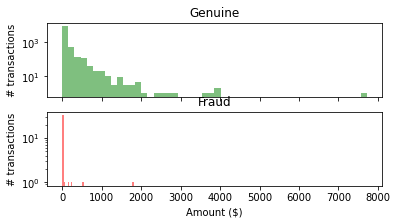

In [41]:
#let us check another feature Amount
fig, (ax3,ax4) = plt.subplots(2,1, figsize = (6,3), sharex = True)
ax3.hist(cc.Amount[cc.Class==0],bins=50,color='g',alpha=0.5)
ax3.set_yscale('log') # to see the tails
ax3.set_title('Genuine') # to see the tails
ax3.set_ylabel('# transactions')
ax4.hist(cc.Amount[cc.Class==1],bins=50,color='r',alpha=0.5)
ax4.set_yscale('log') # to see the tails
ax4.set_title('Fraud') # to see the tails
ax4.set_xlabel('Amount ($)')
ax4.set_ylabel('# transactions')

interesting to note "all transaction amounts > 10K in Genuine Class only". Also this amount feature is not on same scale as principle components.

 So, I'll standardize the values of the 'Amount' feature using StandardScalar and save in data-frame for later use.

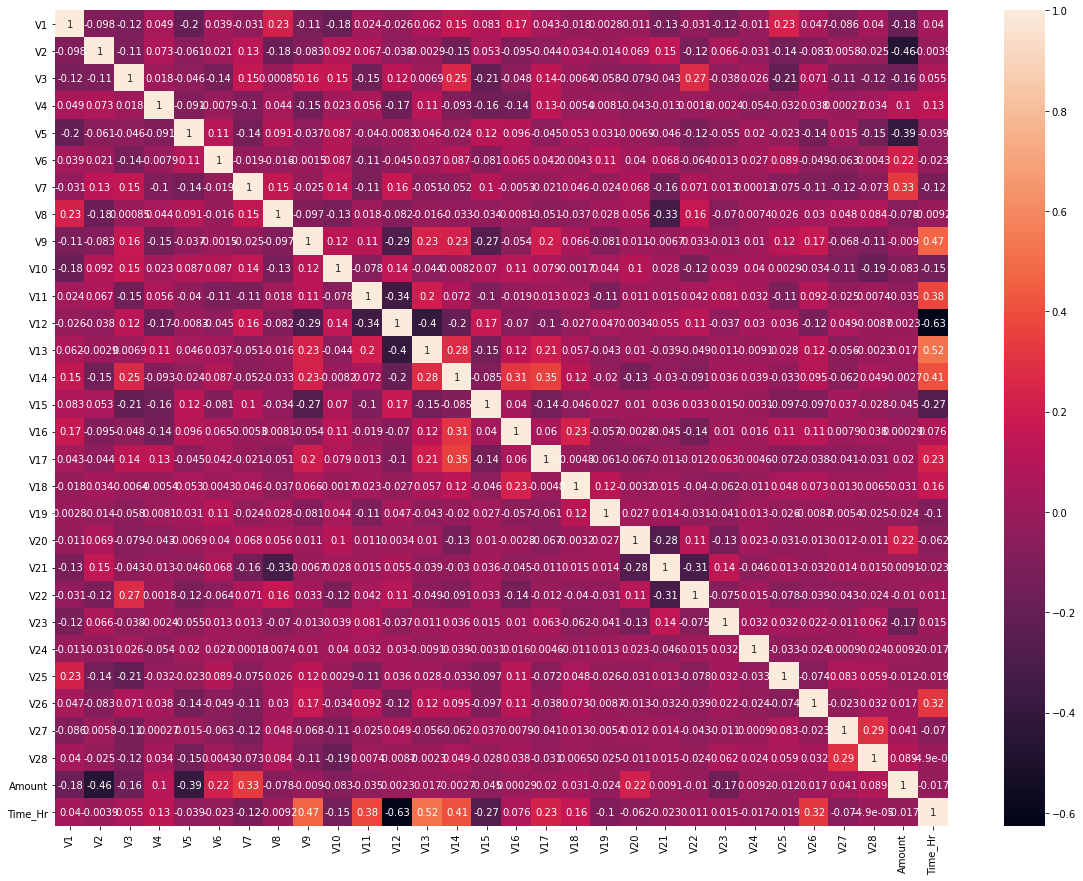

In [43]:
# Seaborn Heatmap that show coorelations 
import seaborn as sns
plt.figure(figsize=(20,15))
sns.heatmap(cc.corr(),annot=True)

In [44]:
cc.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hr
V1,1.000000,-0.097724,-0.121651,0.048906,-0.195764,0.039366,-0.030594,0.229876,-0.112812,-0.183000,0.024134,-0.025948,0.062048,0.154210,0.082548,0.168851,0.042545,-0.018274,0.002769,-0.010867,-0.127610,-0.031425,-0.116673,-0.010840,0.229927,0.046926,-0.086065,0.039544,-0.179395,0.040220
V2,-0.097724,1.000000,-0.110161,0.073169,-0.061484,0.020603,0.128664,-0.175978,-0.082691,0.091575,0.067378,-0.038322,-0.002920,-0.150185,0.053038,-0.094555,-0.044265,0.034434,-0.014130,0.068572,0.146151,-0.121138,0.066026,-0.030688,-0.143618,-0.082603,0.005770,-0.024787,-0.463937,-0.003892
V3,-0.121651,-0.110161,1.000000,0.017932,-0.045608,-0.135680,0.154046,0.000853,0.159135,0.150053,-0.154416,0.121509,0.006905,0.254165,-0.210118,-0.047838,0.135065,-0.006361,-0.058424,-0.078981,-0.043062,0.273281,-0.037822,0.026395,-0.214339,0.071371,-0.113966,-0.117349,-0.162458,0.055055
V4,0.048906,0.073169,0.017932,1.000000,-0.091374,-0.007930,-0.101019,0.043785,-0.145626,0.023243,0.055839,-0.168405,0.107716,-0.092682,-0.160276,-0.143538,0.132589,-0.005389,0.008096,-0.042623,-0.012613,0.001773,-0.002442,-0.054253,-0.032193,0.038373,0.000274,0.034047,0.104773,0.130669
V5,-0.195764,-0.061484,-0.045608,-0.091374,1.000000,0.110955,-0.139896,0.090985,-0.037047,0.087349,-0.040240,-0.008333,0.045677,-0.024011,0.117438,0.096470,-0.044840,0.052850,0.031491,-0.006895,-0.045869,-0.115156,-0.054986,0.020278,-0.023284,-0.138153,0.014845,-0.149219,-0.390725,-0.038572
V6,0.039366,0.020603,-0.135680,-0.007930,0.110955,1.000000,-0.019390,-0.015609,-0.001543,0.087286,-0.105822,-0.045194,0.036634,0.087151,-0.081364,0.065008,0.041729,0.004325,0.105411,0.040162,0.068064,-0.064290,0.013235,0.026933,0.088973,-0.049399,-0.062792,0.004313,0.220732,-0.022782
V7,-0.030594,0.128664,0.154046,-0.101019,-0.139896,-0.019390,1.000000,0.149162,-0.025105,0.141523,-0.114528,0.162665,-0.050838,-0.052439,0.101651,-0.005260,-0.021267,0.045848,-0.023866,0.068087,-0.155986,0.070590,0.013081,0.000126,-0.074627,-0.110700,-0.118736,-0.072621,0.327200,-0.124929
V8,0.229876,-0.175978,0.000853,0.043785,0.090985,-0.015609,0.149162,1.000000,-0.097410,-0.130051,0.018135,-0.082360,-0.015965,-0.032924,-0.033809,0.008122,-0.050633,-0.036527,0.027693,0.056105,-0.325642,0.159203,-0.070183,0.007444,0.025635,0.029797,0.047551,0.083996,-0.078267,-0.009227
V9,-0.112812,-0.082691,0.159135,-0.145626,-0.037047,-0.001543,-0.025105,-0.097410,1.000000,0.117381,0.112918,-0.290738,0.233577,0.228090,-0.265978,-0.054229,0.201666,0.065925,-0.081208,0.011384,-0.006749,0.033389,-0.013198,0.010285,0.120004,0.171552,-0.068005,-0.109917,-0.008965,0.469687
V10,-0.183000,0.091575,0.150053,0.023243,0.087349,0.087286,0.141523,-0.130051,0.117381,1.000000,-0.078130,0.144540,-0.044251,-0.008218,0.070186,0.107866,0.079394,-0.001679,0.044221,0.101815,0.028390,-0.117229,0.038951,0.039918,0.002935,-0.034280,-0.105927,-0.190802,-0.082571,-0.147243


In [48]:
cr = cc[cc.corr() in range(int(-0.4, 0.4))]

TypeError: ignored

In [54]:
cc.corr().Class.sort_values(ascending=False)

AttributeError: ignored

In [55]:
cc[(cc.corr()<-0.4) & (cc.corr()>0.4)]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_Hr
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


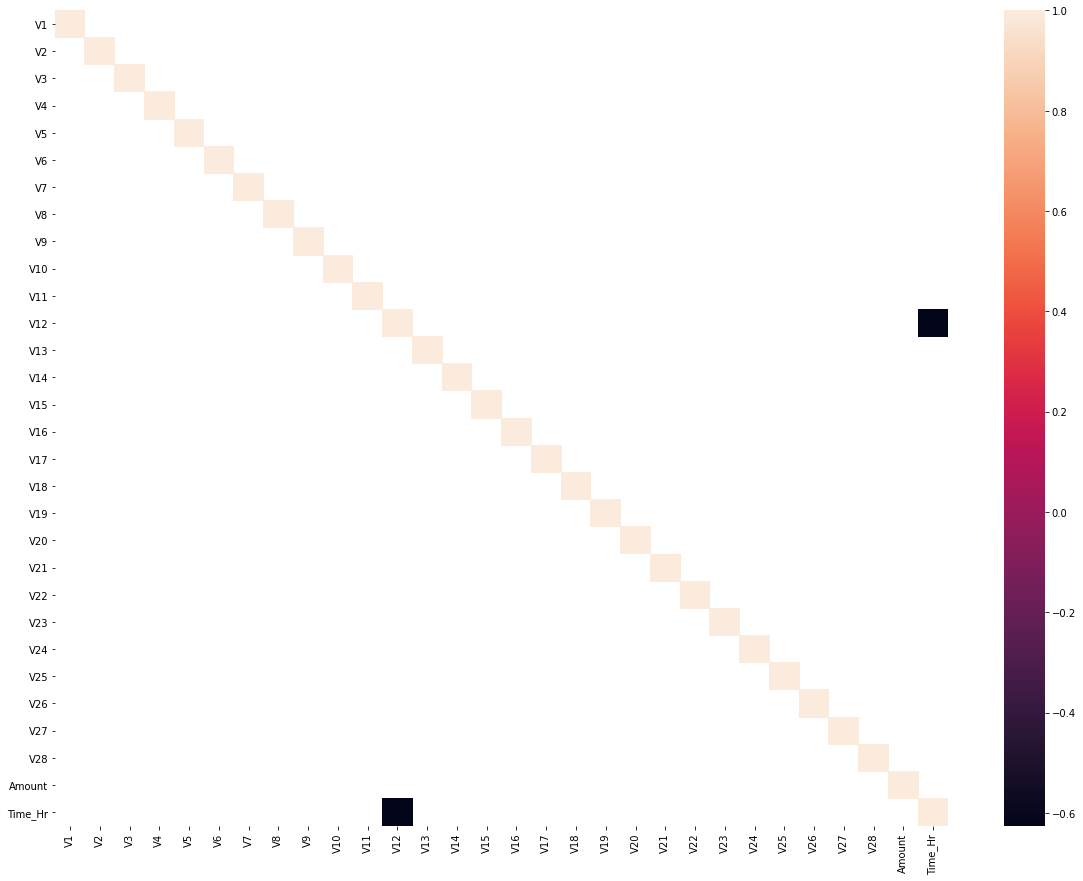

In [56]:
threshold = 0.6
ccr = cc.corr()
df =  ccr[(ccr > threshold) | (ccr < -threshold)]
# to get the pairs of correlated columns 
plt.figure(figsize = (20,15))
sns.heatmap(df)

KeyError: ignored

In [60]:

#7 largest corr (abs values)
target = 'Class'

corr = cc.corr()
corr_abs = corr.abs()

nr_num_cols = 20

cols = corr_abs.nlargest(nr_num_cols, target)[target].index
cm = np.corrcoef(cc[cols].T)

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15,8))
hm = sns.heatmap(cm, annot=True, cmap = 'coolwarm', vmax=.9, linecolor='white', linewidths=.1, mask=mask,
                 fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

KeyError: ignored

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
amount_scaled=StandardScaler().fit_transform(cc["Amount"].values.reshape(-1,1))

In [0]:
cc=cc.drop(["Amount"],axis=1)

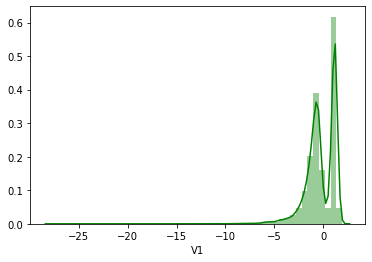

In [74]:
sns.distplot(cc["V1"][cc["Class"]==0],color="g")

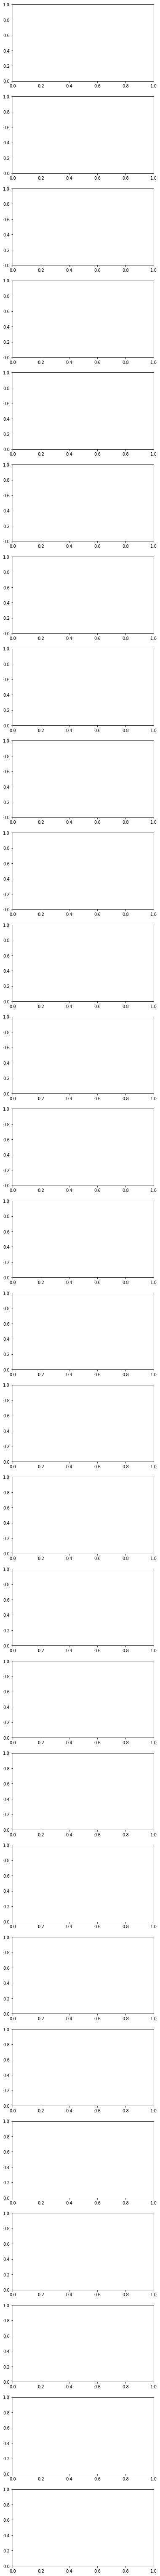

In [76]:
gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(6,28*4))
for i, col in enumerate(cc[cc.iloc[:,0:28].columns]):
    ax5 = plt.subplot(gs[i])

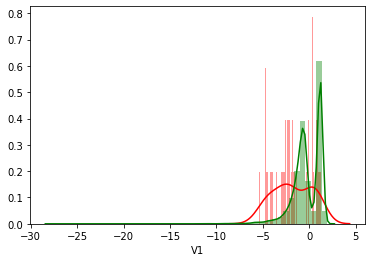

In [79]:
sns.distplot(cc["V1"][cc.Class == 1], bins=50, color='r')
sns.distplot(cc["V1"][cc.Class == 0], bins=50, color='g')

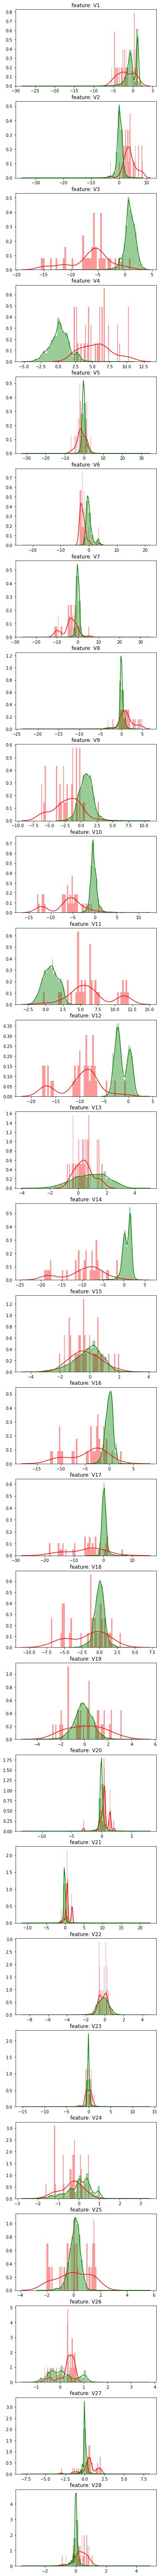

In [67]:
#let us check correlations and shapes of those 25 principal components.
# Features V1, V2, ... V28 are the principal components obtained with PCA.
import seaborn as sns
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(6,28*4))
for i, col in enumerate(cc[cc.iloc[:,0:28].columns]):
    ax5 = plt.subplot(gs[i])
    sns.distplot(cc[col][cc.Class == 1], bins=50, color='r')
    sns.distplot(cc[col][cc.Class == 0], bins=50, color='g')
    ax5.set_xlabel('')
    ax5.set_title('feature: ' + str(col))
plt.show()

For some of the features, both the classes have similar distribution. So, I don't expect them to contribute towards classifying power of the model. So, it's best to drop them and reduce the model complexity, and hence the chances of overfitting. Ofcourse as with my other assumptions, I will later check the validity of above argument.

Now, it's time to split the data in test set (20%) and training set (80%). I'll define a function for it

**Train Test Split**

In [0]:
 # dataframe , drop_list (columns that you would like to drop or not take as part of analysis )
def split_data(cc, drop_list):
    cc = cc.drop(drop_list,axis=1)
    print(cc.columns)
    #test train split time
    from sklearn.model_selection import train_test_split
    y = cc['Class'].values #target
    X = cc.drop(['Class'],axis=1).values #features
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

    print("train-set size: ", len(y_train),
      "\ntest-set size: ", len(y_test))
    print("fraud cases in test-set: ", sum(y_test))
    return X_train, X_test, y_train, y_test

In [0]:
# CC -> 99.9 vs 0.01 % 
# Train - Test --> SHould also have the same split as that is there in the original data 
# when you have huge imabalnce just like 98-2, 99-1 kind , then stratify is important 

Below is funtion to define classifier and get predictions. We can use "predict()" method that checks whether a record should belong to "Fraud" or "Genuine" class. There is another method "predict_proba()" that gives the probabilities for each class. It helps us to learn the idea of changing the threshold that assigns an instance to class 1 or 0, thus we can control precision and recall scores. This would be used to calculate area under ROC.

User defined function to fit and predict the model

In [0]:
# clf is just the model object which you have to pass to this function. You can choose any model 
def get_predictions(clf, X_train, y_train, X_test):
    # create classifier
    clf = clf
    # fit it to training data
    clf.fit(X_train,y_train)
    # predict using test data
    y_pred = clf.predict(X_test)
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = clf.predict_proba(X_test)
    #for fun: train-set predictions
    train_pred = clf.predict(X_train)
    print('train-set confusion matrix:\n', confusion_matrix(y_train,train_pred)) 
    return y_pred, y_pred_prob

 User defined function to print the classifier score

In [0]:
def print_scores(y_test,y_pred,y_pred_prob):
    print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
    print ("The Classification Report: \n", classification_report(y_test, y_pred))
    print("recall score: ", recall_score(y_test,y_pred))
    print("precision score: ", precision_score(y_test,y_pred))
    print("f1 score: ", f1_score(y_test,y_pred))
    print("accuracy score: ", accuracy_score(y_test,y_pred))
    print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))

**Modelling n Prediction**

Case-NB-1 : do not drop anything

In [83]:
drop_list = []
X_train, X_test, y_train, y_test = split_data(cc, drop_list)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'Time_Hr'],
      dtype='object')
train-set size:  8000 
test-set size:  2000
fraud cases in test-set:  8


In [90]:
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)

ValueError: ignored

In [95]:
print(X_test.dtype)
print(X_train.dtype)

float64
float64


In [97]:
print(y_train.dtype)

object


In [0]:
X_test=X_test.astype(float)
X_train=X_train.astype(float)
y_train=y_train.astype(float)
y_test=y_test.astype(float)

In [106]:
y_train.dtype

dtype('float64')

In [107]:
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)

train-set confusion matrix:
 [[7909   61]
 [   1   29]]


Recall High ---> FN are very small -->  It is negative (Fraud), but model is saying positive(Non_Fraud).  - You are optimizing your loss 
Precision Low --> FP are very High ---> It is postive (Non_Fraud), but our model is saying negative (Fraud). - - You loose custover value here!


# whenever the precision is higher --> it's doing too much error because of confusion 
# while the recall is higher signifies that 88% of records were predicted correctly 

In [108]:
print_scores(y_test,y_pred,y_pred_prob)

test-set confusion matrix:
 [[1963   29]
 [   0    8]]
The Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1992
         1.0       0.22      1.00      0.36         8

    accuracy                           0.99      2000
   macro avg       0.61      0.99      0.67      2000
weighted avg       1.00      0.99      0.99      2000

recall score:  1.0
precision score:  0.21621621621621623
f1 score:  0.35555555555555557
accuracy score:  0.9855
ROC AUC: 0.995983935742972


In [0]:
there could be thousands of experiments, we need to figure out different ways to optmize it, such that, 
# we don't exploit time and computation? 
     # Prodction 
     for eachALgo in AllALgo:
       for EachParam in ParamList: 
         Check Recall:
         if recall >= 88%:
           THen go ahead and do other experiment 
           Do the experiment where Precision > 50 % 

In [0]:
   Target for P & R is fixed 
    I can now use all aglo's and their params and see which one of them gives me anythign near that target 

    We let this experiment run in parallel and we create a dashbaord (log) that tracks each of these ecperiments 

In [0]:
# Project Managment Details - Resources, TImelines, Costing, benfits 
# Recall High ---> FN are very small -->  It is negative (Fraud), but model is saying positive(Non_Fraud).  - You are optimizing your loss 
# Precision Low --> FP are very High ---> It is postive (Non_Fraud), but our model is saying negative (Fraud). - - You loose custover value here!

In [0]:
# Data --> 80 - 20 (Random) ---> SimpleML Algo ----> a1 
# How do i know this stable?
# Classification 
# Data --> 80 - 20 (Random) ---> SimpleML Algo (LogReg) ----> a1 --- iteration 1
# Data --> 80 - 20 (Random) ---> SimpleML Algo ----> a2 --- -iteration 2 
# Data --> 80 - 20 (Random) ---> SimpleML Algo ----> a3  --- iteration 3 
If SandardDev (a1, a2, a3) is large ---then model is not stable , which means that <change in data> is not consitent - which means your data has a huge variance 
# How do you make your mdoels robust/stable 
# Do Cross Validation - inner Itration 
# Do outer Iteration of whole ML Cycle multiple time (~5-10) and check StandarDeviation of accuracy
@ Outer Iteration 
# MLOps 
  # Feature Store 
  # Logic Store (You will write your experiemnts and save them as modules, 
  #   such that with any data change or new data, your whole experiemtns/pipeline can run automatically)
  # DVC, Metaflow, MlFlow, Airflow - Python 

** Case-NB-2 : drop some of principle components that have similar distributions in above plots**

In [109]:
drop_list = ['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8'] # they are similar from distribution point of view 
# another way to know which columns to drop is the heatmap function that we have written before

X_train, X_test, y_train, y_test = split_data(cc, drop_list)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class', 'Time_Hr'],
      dtype='object')
train-set size:  8000 
test-set size:  2000
fraud cases in test-set:  8


In [0]:
X_test=X_test.astype(float)
X_train=X_train.astype(float)
y_train=y_train.astype(float)
y_test=y_test.astype(float)

In [112]:
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)

train-set confusion matrix:
 [[7926   44]
 [   1   29]]


In [113]:
print_scores(y_test,y_pred,y_pred_prob)

test-set confusion matrix:
 [[1968   24]
 [   0    8]]
The Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1992
         1.0       0.25      1.00      0.40         8

    accuracy                           0.99      2000
   macro avg       0.62      0.99      0.70      2000
weighted avg       1.00      0.99      0.99      2000

recall score:  1.0
precision score:  0.25
f1 score:  0.4
accuracy score:  0.988
ROC AUC: 0.9982429718875503


**Case-NB-3 : drop some of principle components + Time**

In [114]:
drop_list = ['Time_Hr','V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(cc, drop_list)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class'],
      dtype='object')
train-set size:  8000 
test-set size:  2000
fraud cases in test-set:  8


In [0]:
X_test=X_test.astype(float)
X_train=X_train.astype(float)
y_train=y_train.astype(float)
y_test=y_test.astype(float)

In [116]:
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)

train-set confusion matrix:
 [[7925   45]
 [   1   29]]


In [117]:
print_scores(y_test,y_pred,y_pred_prob)

test-set confusion matrix:
 [[1968   24]
 [   0    8]]
The Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1992
         1.0       0.25      1.00      0.40         8

    accuracy                           0.99      2000
   macro avg       0.62      0.99      0.70      2000
weighted avg       1.00      0.99      0.99      2000

recall score:  1.0
precision score:  0.25
f1 score:  0.4
accuracy score:  0.988
ROC AUC: 0.9977409638554217


**Case-NB-4 : drop some of principle components + Time + 'scaled_Amount'**

In [119]:
drop_list = ['Amount_scaled','Time_Hr','V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(cc, drop_list)

KeyError: ignored

In [120]:
cc.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'Time_Hr'],
      dtype='object')

**Let us now do the predictions with another classifier: logistic regression

My aim is to compare the performance i.e. recall score of GaussianNB() with recall score of logistic regressor for test dataset (which is 20% of full dataset, selected above).

I'll start with running

default logistic regressor
for full imbalanced dataset (I know it is a bad approach, but this is just to get rough estimate)**

**# General Comment 
# Naive Bayes - since it's not a parameteric model - it creates a confusion while understanding overlap cases 
# If you have too much Bias of a specific class, it may not be a good idea to use Naive Bayes since you will mostly suffer from lower precisions 
# When we have so much bias or soo much imbalance - it's better to use parameteric models 

# Can we not combine both the models?  ----> Model Stacking ---> XGBoost || Model Ensemble || Random Forest|** italicized text

In [121]:
# let us check recall score for logistic regression
y_pred, y_pred_prob = get_predictions(LogisticRegression(C = 0.01, penalty = 'l2')
                                      , X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

train-set confusion matrix:
 [[7970    0]
 [   5   25]]
test-set confusion matrix:
 [[1992    0]
 [   2    6]]
The Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1992
         1.0       1.00      0.75      0.86         8

    accuracy                           1.00      2000
   macro avg       1.00      0.88      0.93      2000
weighted avg       1.00      1.00      1.00      2000

recall score:  0.75
precision score:  1.0
f1 score:  0.8571428571428571
accuracy score:  0.999
ROC AUC: 0.999937248995984


As we see, by learning from full imbalanced dataset this default logistic regressor performs very poorly. So let us try to train it in tradional way i.e. from under-sampled data.

In [0]:
#Lets take only that percent of genuine-class cases which is equal to all fraud-classes i.e. consider 50/50 ratio of both classes.#

In [122]:
# get indices for fraud and genuine classes 
fraud_ind = np.array(cc[cc.Class == 1].index)
gen_ind = cc[cc.Class == 0].index  # indexs of all non fraud cases in dataframe
n_fraud = len(cc[cc.Class == 1])  # total number of fraud cases 
# random selection from genuine class
random_gen_ind = np.random.choice(gen_ind, n_fraud, replace = False) # pick total number of nonfraud cases === len(fraud_cases)
random_gen_ind = np.array(random_gen_ind)
# merge two class indices: random genuine + original fraud
under_sample_ind = np.concatenate([fraud_ind,random_gen_ind])
# Under sample dataset
undersample_cc = cc.iloc[under_sample_ind,:]
y_undersample  = undersample_cc['Class'].values #target
X_undersample = undersample_cc.drop(['Class'],axis=1).values #features

print("# transactions in undersampled data: ", len(undersample_cc))
print("% genuine transactions: ",len(undersample_cc[undersample_cc.Class == 0])/len(undersample_cc))
print("% fraud transactions: ", sum(y_undersample)/len(undersample_cc))

# transactions in undersampled data:  76
% genuine transactions:  0.5
% fraud transactions:  0.5


In [124]:
# This is UPSAMPLING Example 
factor_to_replicate = 200
cc_copy=[]
cc_copy.append(pd.concat([cc_fraud]*factor_to_replicate, ignore_index=True) ,ignore_index=True)['Class'].value_counts()
drop_list = []
X_train, X_test, y_train, y_test = split_data(cc_copy, drop_list)
y_pred, y_pred_prob = get_predictions(LogisticRegression(C = 0.01, penalty = 'l2')
                                      , X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

NameError: ignored